# LSTM Neural Network for [Your Task]

## Table of Contents
- Import Libraries
- Data Preparation
- Data Visualization
- Model Architecture
- Training the Model
- Results and Evaluation


## Install Dependencies

In [ ]:
!pip install tensorflow pandas numpy matplotlib scikit-learn matplotlib

## Import Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import StandardScaler

## Data Preparation

In [95]:
# Load the entire dataset
data = pd.read_csv('question4-stock-data.csv')

# Specify how many rows to reserve for the test set
n_test = 5  # change this number as needed

# Save the last n_test rows to a new CSV file for testing
df_test = data.tail(n_test)
df_test.to_csv('test.csv', index=False)

# Load the remaining data into df
df = data.iloc[:-n_test]

# Display the first few rows of the main DataFrame
df.head()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [81]:
# drop 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_20660\3705047027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Unnamed: 0'], inplace=True)


,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [82]:
# Check for missing values
print(f"Missing values in the dataset:\n{df.isnull().sum()}")

Missing values in the dataset:
Date         110
Adj Close     93
Close        117
High          95
Low          127
Open         103
Volume       145
dtype: int64


In [83]:
# Forward Fill missing values (propagate previous values)
df.fillna(method='ffill', inplace=True)

# After handling missing values, verify if there are still any missing values
print(f"Missing values after handling:\n{df.isnull().sum()}")

Missing values after handling:
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_20660\1760823774.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_20660\1760823774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)


## Data Visualization

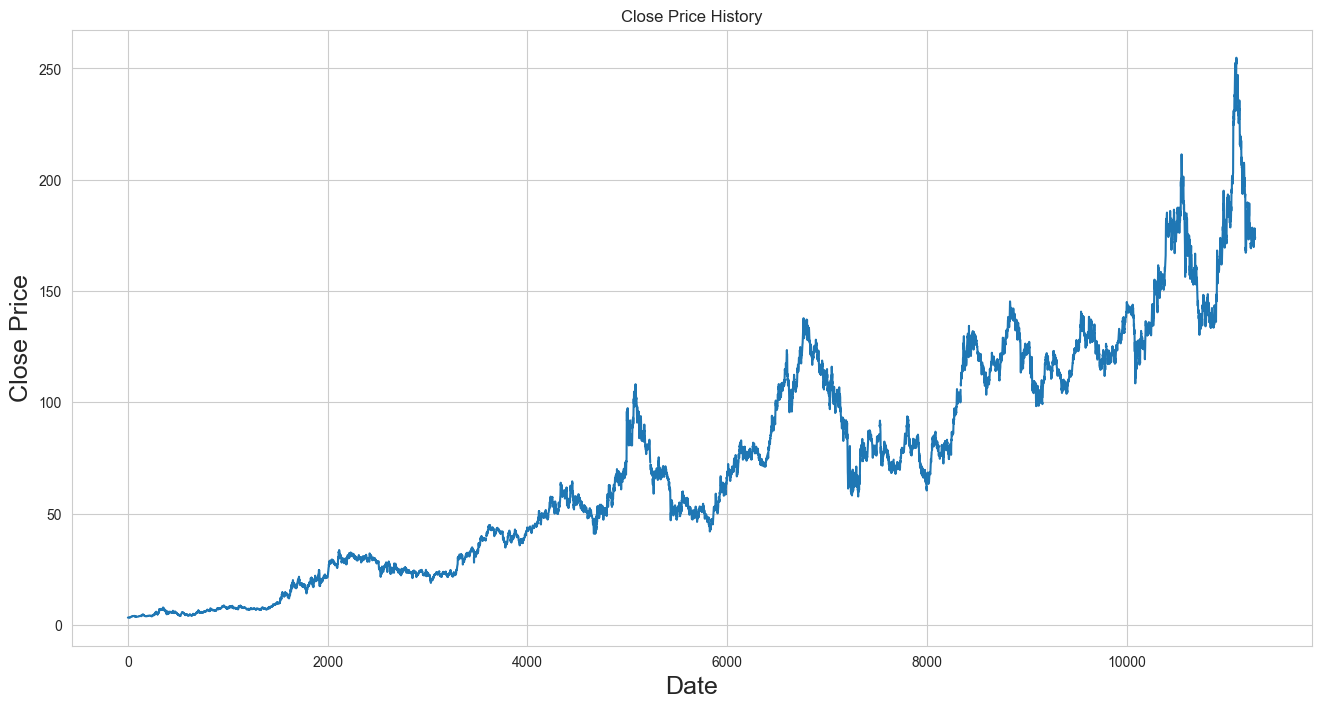

In [96]:
# Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [84]:
training_set = df.iloc[:, 2:3].values  # All rows except the last 5 for training
test_set = df.iloc[:, 2:3].values     # Last 5 rows for testing

print(f"Shape of training set: {training_set.shape}")
print(training_set)

Shape of training set: (11286, 1)
[[  3.2912271 ]
 [  3.30460596]
 [  3.30460596]
 ...
 [173.2799988 ]
 [173.6199951 ]
 [174.2100067 ]]


In [85]:
# Feature Scaling
scaler = StandardScaler()
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[-1.34087899],
       [-1.34061792],
       [-1.34061792],
       ...,
       [ 1.97614749],
       [ 1.98278191],
       [ 1.99429493]])

In [86]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(scaled_training_set)):
    X_train.append(scaled_training_set[i-60:i, 0])
    y_train.append(scaled_training_set[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

In [87]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")

Shape of X_train: (11226, 60)
Shape of y_train: (11226,)


In [88]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(11226, 60, 1)

## Model Architecture

In [89]:
regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Training the Model

In [90]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - loss: 0.0930
Epoch 2/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 51ms/step - loss: 0.0155
Epoch 3/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 18s 52ms/step - loss: 0.0145
Epoch 4/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - loss: 0.0124
Epoch 5/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - loss: 0.0131
Epoch 6/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 16s 45ms/step - loss: 0.0131
Epoch 7/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0120
Epoch 8/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0110
Epoch 9/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0109
Epoch 10/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0105
Epoch 11/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0091
Epoch 12/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0103
Epoch 13/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0101
Epoch 14/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 0.0093
Epoch 15/30
351/351 ━━━━━━━━━

## Results and Evaluation

In [91]:
dataset_test = pd.read_csv('test.csv')
real_stock_price = dataset_test.iloc[:, 2:3].values

In [92]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, 60 + n_test):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [93]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


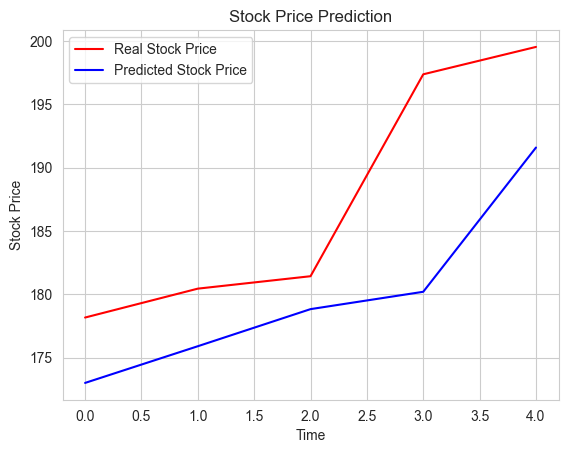

In [94]:
plt.plot(real_stock_price, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [101]:
mean_error = np.mean(np.abs(real_stock_price - predicted_stock_price))

In [102]:
print(f"Mean Error: {mean_error}")

Mean Error: 7.478607182578133
